# Задание №1 (март)


*ФИО* : Самойлов Александр Павлович

* 1) Загрузите одно из изображений по ссылке ниже.
Здесь на картинке присутствует несколько объектов одинакового размера, расположенных в 4 ряда  и 6 столбцов.
* 2) Напишите функцию, которая принимая номер ряда и столбца (начиная с 0, сверху вниз, слева направо) и возвращает (вырезает) изображение объекта по этим координатам.
* 3) Используя предобученную сеть получите векторное представление для заданного объекта. Можно использовать любую библиотеку и сеть, но так, чтобы выполнилось условие на различимость.
* 4) Пробегитесь по всем объектам (6*4=24 штуки). Получайте векторное представление для каждого объекта и сравните по косинусной похожести с заданным в предыдущем пункте. Запишите похожесть в таблицу.
* 5) Нарисуйте таблицу на графике, как на рис. ниже, подписав уровень похожести. Также посчитайте и нарисуйте среднюю похожесть для каждой строки.

**Следует использовать такие сети, для которых похожесть объекта на объекты в своем ряду в среднем больше чем на объекты других рядов.**

Код должен работать для любых объектов этих картинок по их номеру ряда и столбца. Для теста используйте нижний левый объект ( row = 3, col = 0).

Выполняйте в colab-файле, укажите ФИО и отправьте ссылку на ваше решение в форму:

https://docs.google.com/forms/d/e/1FAIpQLSdVGs4OoUjfmbVq00sWoShNdiUfdgfuFJUog8Q4Mcc4dz-Urw/viewform

Не забудьте дать доступ на чтение к вашему файлу.

К коду пишите подробные комментарии для каждого действия (построчно).

Базовая оценка 10.
Оценивается полностью рабочий код, частично выполненное задание не оценивается.

Оценка может быть снижена за:
* непонятный, лишний или обфусцированный код
* ненужные заимствования кода. Для получения самих векторов разрешены заимствования. Также можно пользоваться готовыми функциями библиотек.
* непонятный или нечитаемый вывод на экран, наложения, смешивание текста и т.п.

Списывание и использование генеративного контента **не допускается**.



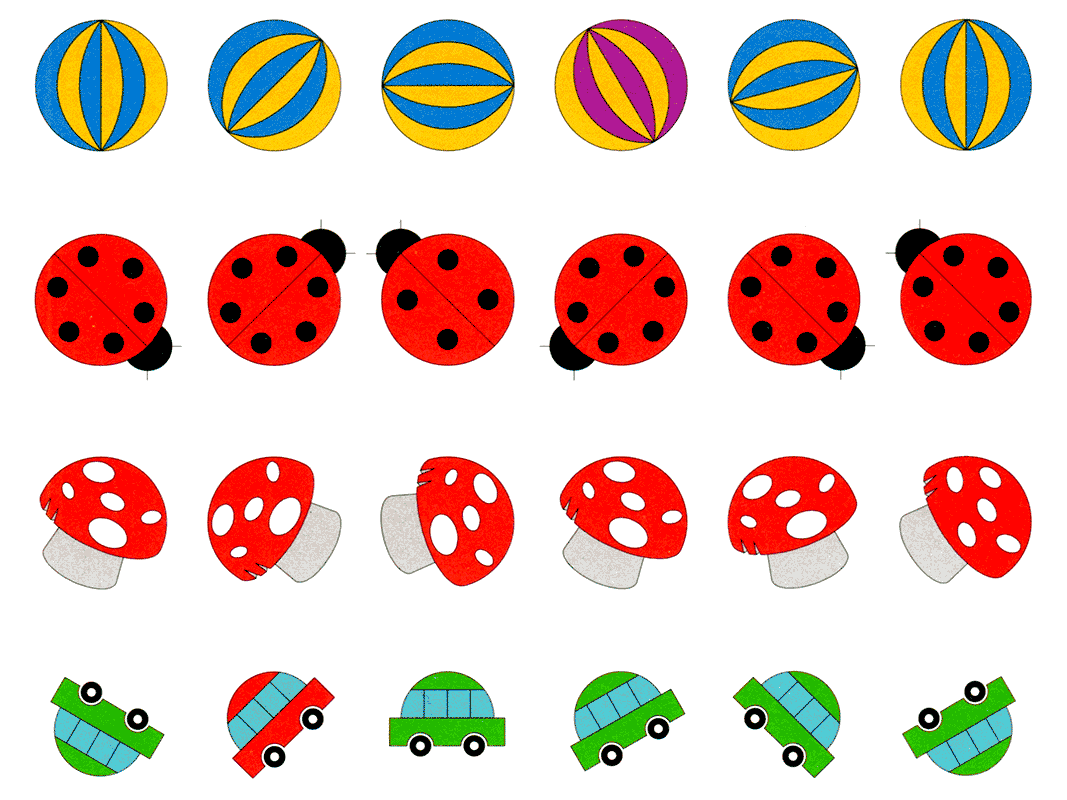

In [ ]:

#URL="https://doshkolniki.org/images/psixologiya/uprazhneniya/020-najdilishnyuyu-kartinku.gif"
#URL="https://doshkolniki.org/images/psixologiya/uprazhneniya/021-najdilishnyuyu-kartinku.gif"
#URL="https://doshkolniki.org/images/psixologiya/uprazhneniya/022-najdilishnyuyu-kartinku.gif"
#URL="https://doshkolniki.org/images/psixologiya/uprazhneniya/023-najdilishnyuyu-kartinku.gif"


Пример матрицы пожожести:

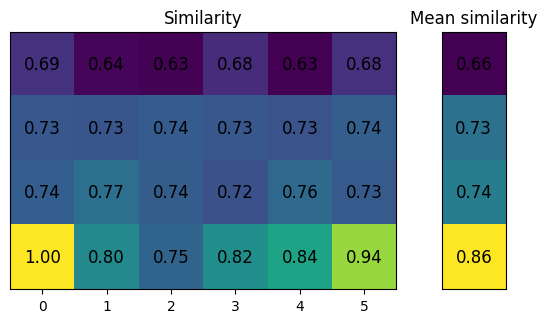

In [ ]:
!pip install img2vec_pytorch ## импортируем сеть img2vec (img2vec_keras почему-то не получилось установить)

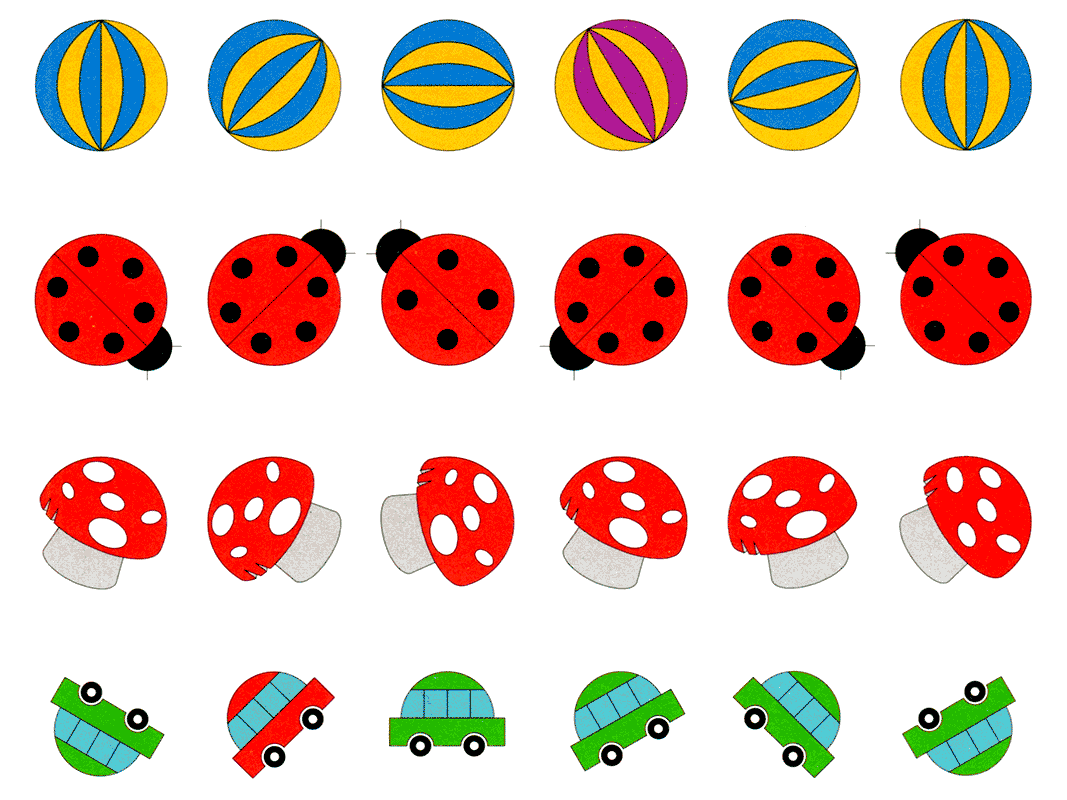

In [ ]:
import numpy as np # импортируем numpy для работы с np.array объектами
import matplotlib.pyplot as plt # импортируем matplotlib, чтобы нарисовать таблицу в конце
from sklearn.metrics.pairwise import cosine_similarity # импортируем из sklearn функцию косинусальной похожести
from img2vec_pytorch import Img2Vec # импортируем Img2vec для векторных представлений
from PIL import Image # импортируем image из pillow для работы с изображениями
import requests # импортируем reques, чтобы работать с изображением через ответ на запрос
from io import BytesIO # импортируем BytesID, чтобы обработать ответ через request
import matplotlib.gridspec as gridspec #импортируем gridspec для автоматического сопоставления двух таблиц(similarity и mean similarity)

url="https://doshkolniki.org/images/psixologiya/uprazhneniya/020-najdilishnyuyu-kartinku.gif" # ссылка на исходное изображение
response = requests.get(url) #делаем запрос на ее получение
img = Image.open(BytesIO(response.content))# вычленяем из ответа только картинку и записываем в img
img

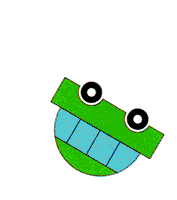

In [ ]:
def extract_object(img, row, col, num_rows=4, num_cols=6):
    """Функция для вырезания объекта из изображения по номеру ряда и столбца."""
    width, height = img.size # получаем ширину и длину изображения
    obj_width = width // num_cols # считаем ширину нашей маленькой картиночки (объекта)
    obj_height = height // num_rows # считаем длину нашей маленькой картиночки (объекта)
    left = col * obj_width # считаем левую верхнюю координату
    top = row * obj_height
    right = left + obj_width # считаем  правую нижнюю координату
    bottom = top + obj_height
    return img.crop((left, top, right, bottom)) # возвращаем нашу маленькую картиночку(объект)

vec_1 = extract_object(img, 3, 0) # сразу обозначаем объект, по вектору которого будем сравнивать похожесть
vec_1

In [ ]:
img2vec = Img2Vec()  # инициализирум img2vec
def get_vector(image):
    """Функция для получения векторного представления картинки"""
    image = image.convert('RGB') # переводим наше изображение в RGB чтобы передать в get_vec
    return np.reshape(img2vec.get_vec(image),(1,-1)) # получаем вектор изображения размером 1 на 512
get_vector(vec_1).shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(1, 512)

In [ ]:
def compare_objects(img, obj_img, num_rows=4, num_cols=6):
    """Функция сравнения объектов и формиррования таблицы similarity"""
    similarity_matrix = [] # создаем пустой list
    obj_vector_np = get_vector(obj_img) # считаем веткор нашего заданного изображения для сравнения
    for row in range(num_rows): # пробегаемся по всем строкам
        row_similarities = [] # создаем пустой list для формирования строки
        for col in range(num_cols): # пробегаемся по всем колонкам
            current_obj = extract_object(img, row, col, num_rows, num_cols) # вырезаем объект
            current_vector_np = get_vector(current_obj) # считаем его вектор
            similarity = cosine_similarity(obj_vector_np, current_vector_np).item() # рассчитываем косинусную похожесть и берем только значние
            row_similarities.append(similarity) # добавляем значение в list строки
        similarity_matrix.append(row_similarities) # добавляем строку в нашу матрицу similarity
    return similarity_matrix # возвращаем результат
similarity_matrix = compare_objects(img,vec_1) # рассчитываем матрицу для нашего исходного изображения и заданного для сравнения она должна быть размером 4х6
similarity_matrix

[[0.6855893135070801,
  0.6357956528663635,
  0.6331731081008911,
  0.6772947907447815,
  0.6310572624206543,
  0.6839844584465027],
 [0.7315452694892883,
  0.7298839092254639,
  0.738085925579071,
  0.7308126091957092,
  0.7261154055595398,
  0.7427254319190979],
 [0.7419475317001343,
  0.7662913799285889,
  0.7399526834487915,
  0.722480833530426,
  0.7571901082992554,
  0.734882116317749],
 [0.9999999403953552,
  0.8048628568649292,
  0.750140905380249,
  0.8153486251831055,
  0.844902753829956,
  0.9432055950164795]]

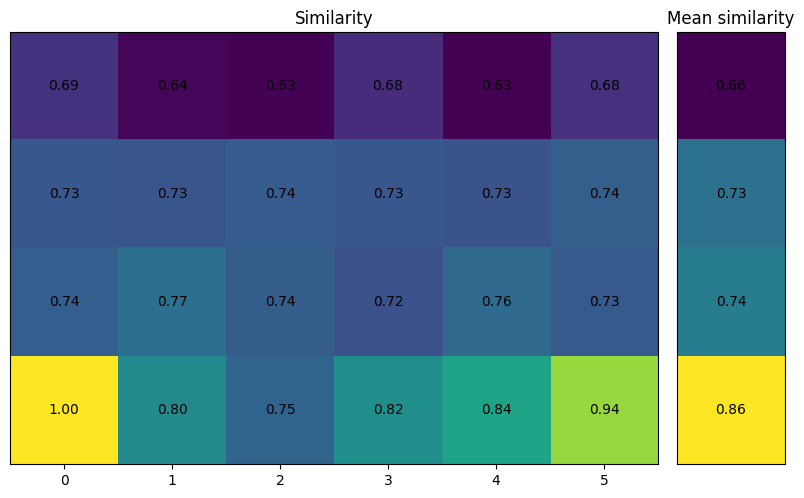

In [ ]:
def plot_similarity_matrix(matrix):
    """Функция для отображаения нашей матрицы similarity и mean similarity"""
    matrix_np = np.array(matrix) # преобразовываем списка списков в numpy массив
    mean_similarities = np.mean(matrix_np, axis=1) # рассчитываем среднюю похожесть для каждой строки
    fig = plt.figure(figsize=(10, 6))  # указываем размер фигуры для отображения
    gs = gridspec.GridSpec(1, 2, width_ratios=[len(matrix[0]), 1], wspace=0.05)# создаем сетку для двух графиков
    """ не знаю надо ли подробно, но пусть будет)
        Предыдущая строка создает сетку с двумя столбцами, причем первый столбец имеет ширину,
        равную длине первой строки матрицы, а второй столбец имеет ширину 1.
        Горизонтальное расстояние между столбцами составляет 0.05 от общей ширины сетки.
    """
    ax1 = plt.subplot(gs[0]) # создаем основную область для тепловой карты similarity в первом столбце сетки
    cax1 = ax1.matshow(matrix_np, cmap='viridis') # рисуем тепловую карту, используя матрицу matrix_np с цветовой схемой 'viridis' в области ax1
    ax1.xaxis.set_ticks_position('bottom') # устанавливаем позицию индексации по оси x внизу графика ax1
    ax1.set_xticks(range(len(matrix[0]))) # устанавливаем индексацию по оси x в соответствии с длиной первой строки матрицы matrix
    ax1.set_yticks([]) # устанавливаем индексацию по оси y пустой
    for (i, j), val in np.ndenumerate(matrix_np):
        ax1.text(j, i, f'{val:.2f}', ha='center', va='center') # добавляем значения похожести в ячейки тепловой карты по центру ячейки

    ax2 = plt.subplot(gs[1]) # создаем дополнительную область для тепловой карты mean similarity во втором столбце сетки
    cax2 = ax2.matshow(mean_similarities.reshape(-1, 1), cmap='viridis') # рисуем тепловую карту, используя матрицу mean_similarities с цветовой схемой 'viridis' в области ax2
    ax2.set_xticks([]) # устанавливаем индексацию по оси x пустой
    ax2.set_yticks([]) # устанавливаем индексацию по оси y пустой
    for i, mean_val in enumerate(mean_similarities):
        ax2.text(0, i, f'{mean_val:.2f}', va='center', ha='center') # добавляем средние значения похожести в ячейки тепловой карты по центру ячейки

    ax1.set_title('Similarity') # устанавливаем заголовок для основной матрицы
    ax2.set_title("Mean similarity") # устанавливаем заголовок для дополнительной матрицы
    plt.show() # отображаем график
plot_similarity_matrix(similarity_matrix)